<a href="https://colab.research.google.com/github/Hands-On-Fraud-Analytics/Chapter-18-Social-Network-Analysis-Practical-Examples/blob/main/Chapter_18_Exploring_Fraud_Through_Network_Visualization_and_Homophily.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Money mules are individuals who allow their bank accounts to be used by criminals to launder illicit proceeds.

Identifying these accounts is crucial for disrupting money laundering operations. In this hands-on example, we use Python’s networkx and pandas libraries to analyze transactional networks and assess the probability of an account acting as a money mule.

**Objective**: To identify potential money mule accounts using known indicators and evaluate the likelihood of involvement using graph topology metrics (specifically the degree ratio in subgraphs).

**Techniques Covered:**

•	Constructing a transaction graph.
•	Assigning account type as node attributes.

•	Applying color mapping for better visual detection.

•	Calculating assortativity coefficient to evaluate homophily in the fraud network.



**Step 1:** Importing necessary libraries: This code imports necessary libraries for data manipulation, network analysis, and visualization.

In [1]:
# Step 1: Import required libraries
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


**Step 2:** Loading the data:  These two lines load the transfers and account information from csv files into pandas DataFrame.

In [2]:
# Step 2: Load datasets
transfers = pd.read_csv('transfers.csv')         # Includes originator, beneficiary, amount, etc.
account_info = pd.read_csv('account_info.csv')   # Includes id, isMoneyMule, type


**Step 3:** Creating a network (graph): Here, a graph is created from the transfers data. This graph is undirected (nx.Graph()), and additional attributes ('amount', 'time', 'benef_country', 'payment_channel') for the edges are included.

In [3]:
# Step 3: Create a graph from the transfer data
G = nx.from_pandas_edgelist(
    transfers,
    source='originator',
    target='beneficiary',
    edge_attr=True,
    create_using=nx.Graph()  # Undirected graph to study homophily
)

**Step 4:** Adding node attribute: These lines of code assign the 'type' from the 'account_info' DataFrame to the nodes in the network graph G as an attribute named 'account_type'.

In [4]:
# Step 4: Add account type attribute to nodes
account_types = account_info.set_index('id').to_dict()['type']
nx.set_node_attributes(G, account_types, 'account_type')


**Step 5:** Map account types to integers for assortativity calculation

In [5]:
# Step 5: Map account types to integers for assortativity calculation
# Example: type 1 → 1, type 2 → 2, type 3 → 3
type_set = set(account_types.values())
type_mapping = {v: i+1 for i, v in enumerate(type_set)}
integer_type_attributes = {node: type_mapping.get(account_types[node], 0) for node in G.nodes if node in account_types}
nx.set_node_attributes(G, integer_type_attributes, 'account_type_int')

**Step 6:** Computing assortativity: This step calculates the assortativity for node attributes. This measures the correlation between connected nodes in the network.

In [6]:
# Step 6: Calculate assortativity coefficient (homophily measure)
assortativity = nx.attribute_assortativity_coefficient(G, 'account_type_int')
print(f"Assortativity based on account_type: {assortativity:.2f}")

Assortativity based on account_type: 0.18


**Step 7:** Defining a color map and adding color attribute to nodes: Here, a color map is defined for the different account types. The 'color' attribute is then added to each node in the graph G, based on its 'account_type'.

In [7]:
# Step 7: Define a color map for account types
color_palette = {1: 'grey', 2: 'lightblue', 3: 'darkorange'}  # Customize based on your actual types
node_colors = []
for node in G.nodes():
    node_type = account_types.get(node)
    color = color_palette.get(node_type, 'lightgrey')  # Default color if unknown
    node_colors.append(color)

**Step 8:** Draw the network graph

/tmp/ipython-input-3425060070.py:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


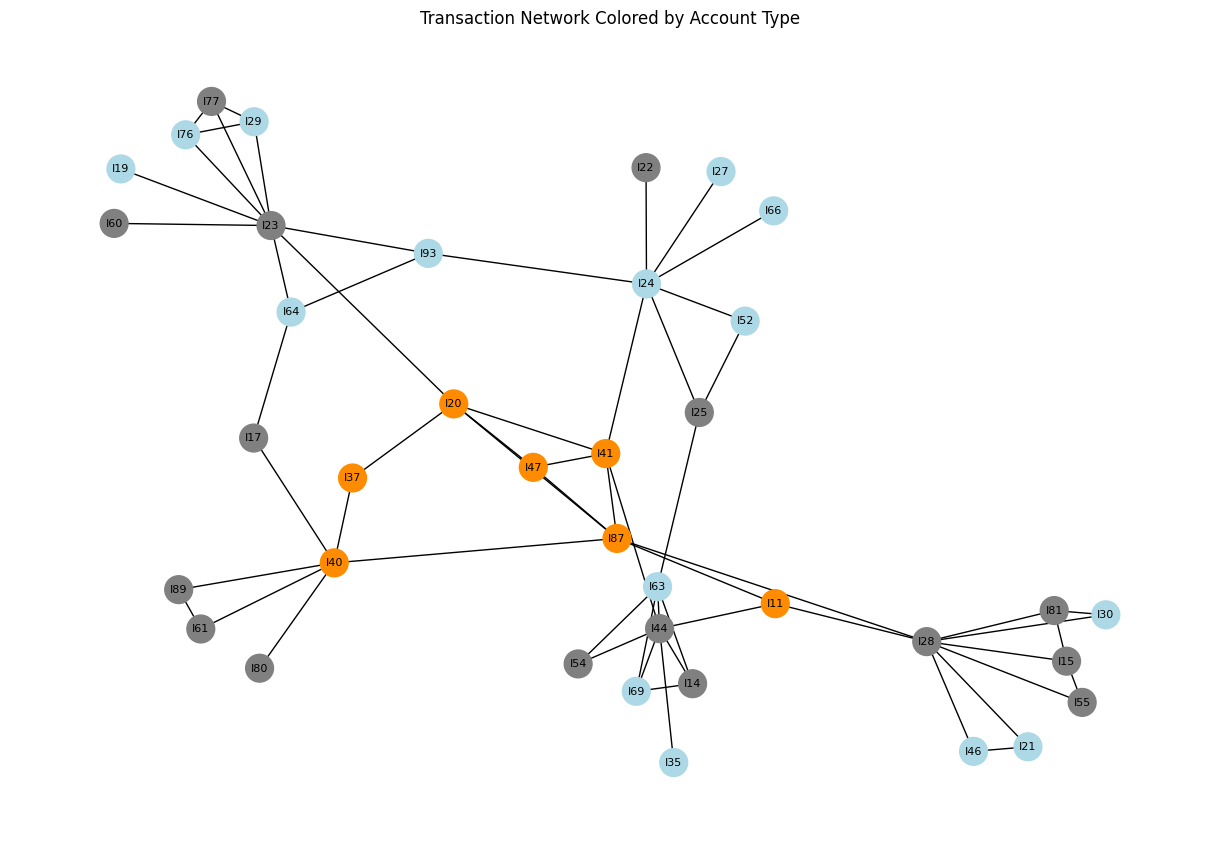

In [8]:
# Step 8: Draw the network graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, node_color=node_colors, with_labels=True, node_size=400, font_size=8)
plt.title("Transaction Network Colored by Account Type")
plt.axis('off')
plt.tight_layout()
plt.show()